In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import humanize as hm
from keras.models import Sequential
from keras.layers import Dense, Activation
%matplotlib inline

Using TensorFlow backend.


In [3]:
gpdframe = pd.read_csv("datasets/gpd.csv")



In [6]:
gpd_years = []
gpd_values = gpdframe.values.astype(float)
gpd_values = np.array(gpd_values[0]/1000000000000)
for i in gpdframe:
    gpd_years.append(i)
gpd_years = np.asarray(gpd_years)

In [7]:
print(gpd_years)

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']


In [8]:
print(gpd_values)
print(hm.intword(gpd_values[50]))

[0.01516557 0.01523685 0.01992629 0.02302148 0.02121189 0.02179004
 0.02706272 0.03059183 0.03387588 0.0374589  0.0423276  0.04920446
 0.05853901 0.07927906 0.10513601 0.12370938 0.15267802 0.17617128
 0.20080089 0.22496949 0.2350246  0.26356109 0.2816823  0.20330452
 0.20902391 0.22294279 0.26813722 0.29408411 0.33039738 0.42559531
 0.46195178 0.60286    0.40059925 0.43779858 0.558112   0.78564346
 0.85042583 0.88319944 0.8637234  0.59938888 0.65542115 0.5593725
 0.50796274 0.55832012 0.66931624 0.89162997 1.10764033 1.39708438
 1.69582452 1.66701961 2.20887165 2.61620158 2.46518867 2.47280692
 2.4559932  1.80365265 1.79618659]
2


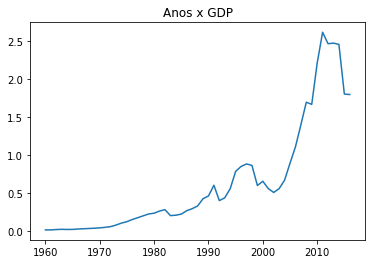

In [9]:
plt.plot(gpd_years,gpd_values)
plt.title('Anos x GDP')
xlegend = np.arange(min(gpd_years.astype(int)),max(gpd_years.astype(int)),10)
plt.xticks(xlegend,(xlegend))
#plt.ylim()
plt.show()

In [10]:
column_names = np.arange(1990,2018,1)
carframe = pd.read_csv("datasets/car.csv",header=None,  names = column_names)
car_amount=carframe.values[0]
print(car_amount)

[ 712708  791508  771477 1166188 1426651 1684846 1728558 1931016 1546618
 1176881 1411752 1586928 1466487 1431381 1578836 1714724 1925898 2462605
 2820963 3141009 3515039 3632974 3801703 3767165 3497818 2568980 2050240
 2239659]


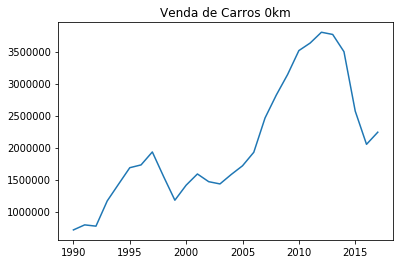

In [11]:
plt.plot(np.arange(1990,2018,1),car_amount)
plt.title('Venda de Carros 0km')
plt.show()

In [12]:
print(max(gpd_years.astype(int))-min(gpd_years.astype(int)))
print(len(car_amount[0:len(car_amount)-1]))
print(len(gpd_values[30:len(gpd_values)]))


56
27
27


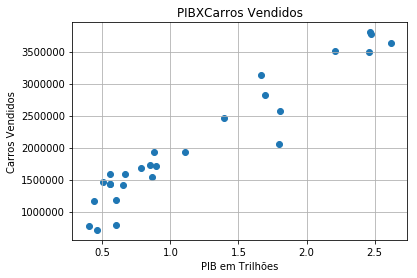

In [13]:
plt.scatter(gpd_values[30:len(gpd_values)],car_amount[0:len(car_amount)-1])
plt.grid(True)
plt.xlabel('PIB em Trilhões')
plt.ylabel('Carros Vendidos')
plt.title('PIBXCarros Vendidos')
plt.show()

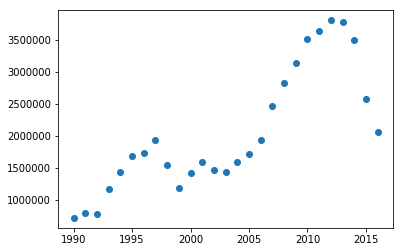

In [14]:
plt.scatter(np.arange(1990,2017,1),car_amount[0:len(car_amount)-1]);
plt.show()

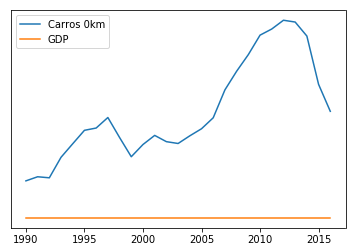

In [73]:
plt.plot(np.arange(1990,2017,1),car_amount[0:len(car_amount)-1], label='Carros 0km')
plt.plot(np.arange(1990,2017,1),gpd_values[30:len(gpd_values)], label='GDP')
plt.yticks([])
plt.legend()
plt.show()

In [94]:
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))
model.compile(optimizer='sgd',
              loss='mse')

In [95]:
X,Y=gpd_values[30:len(gpd_values)],(car_amount[0:len(car_amount)-1]/1000000)
trX = np.linspace(-1, 1, 27)
trY = (2 * trX) + (np.random.randn(*trX.shape) * 0.33)
print(Y)

#model.fit(trX,trY , epochs=100, verbose=1)
model.fit(Y[0:len(Y)-1],X[0:len(X)-1] , epochs=100, verbose=1)

[0.712708 0.791508 0.771477 1.166188 1.426651 1.684846 1.728558 1.931016
 1.546618 1.176881 1.411752 1.586928 1.466487 1.431381 1.578836 1.714724
 1.925898 2.462605 2.820963 3.141009 3.515039 3.632974 3.801703 3.767165
 3.497818 2.56898  2.05024 ]
Epoch 1/100
26/26 [==============================] - 0s 3ms/step - loss: 5.5396
Epoch 2/100
26/26 [==============================] - 0s 43us/step - loss: 4.3029
Epoch 3/100
26/26 [==============================] - 0s 91us/step - loss: 3.3439
Epoch 4/100
26/26 [==============================] - 0s 38us/step - loss: 2.6001
Epoch 5/100
26/26 [==============================] - 0s 38us/step - loss: 2.0233
Epoch 6/100
26/26 [==============================] - 0s 35us/step - loss: 1.5761
Epoch 7/100
26/26 [==============================] - 0s 74us/step - loss: 1.2292
Epoch 8/100
26/26 [==============================] - 0s 46us/step - loss: 0.9602
Epoch 9/100
26/26 [==============================] - 0s 41us/step - loss: 0.7516
Epoch 10/100
26/26 [====

Epoch 98/100
26/26 [==============================] - 0s 125us/step - loss: 0.0310
Epoch 99/100
26/26 [==============================] - 0s 160us/step - loss: 0.0310
Epoch 100/100
26/26 [==============================] - 0s 60us/step - loss: 0.0310


In [96]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]

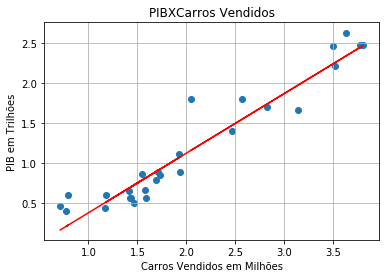

In [98]:
plt.scatter(Y,X)
plt.grid(True)
plt.ylabel('PIB em Trilhões')
plt.xlabel('Carros Vendidos em Milhões')
plt.title('PIBXCarros Vendidos')
plt.plot(Y, w*Y + b, c='red')
plt.show()

In [99]:
#print(X)
out = np.array([2.05024])
print(model.predict(out))
print(X)

[[1.1607797]]
[0.46195178 0.60286    0.40059925 0.43779858 0.558112   0.78564346
 0.85042583 0.88319944 0.8637234  0.59938888 0.65542115 0.5593725
 0.50796274 0.55832012 0.66931624 0.89162997 1.10764033 1.39708438
 1.69582452 1.66701961 2.20887165 2.61620158 2.46518867 2.47280692
 2.4559932  1.80365265 1.79618659]
